#### *ISEL - DEI - LEIM*
## Aprendizagem Automática [T52D]
### **Trabalho Laboratorial 1:** *Pima Indians Diabetes Dataset*

- João Madeira ($48630$),
- Renata Góis ($51038$),
- Bruno Pereira ($51811$)

**Docente responsável:** Prof. Gonçalo Xufre Silva

In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tools import get_best_params, predition_stats, linearRegr, polinomialRegr, normalize_data, ROC_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##### **1.** Estudo da Base de Dados
---

In [2]:
with open("pimaDiabetes.p", "rb") as f:
    dataset = pickle.load(f)
print("Tipo:", type(dataset))

X = dataset.data   # features
y = dataset.target # labels
print("\nDimensão de X:", X.shape)
print("Dimensão de y:", y.shape)

Tipo: <class 'sklearn.utils._bunch.Bunch'>

Dimensão de X: (768, 8)
Dimensão de y: (768,)


O *Pima Indians Diabetes Dataset*, originalmente desenvolvido pelo Instituto Nacional de Diabetes e Doenças
Digestivas e Renais dos Estados Unidos da America, contém informações sobre $768$ mulheres de uma das tribos indígenas desse país. Devido a uma alta taxa de incidencia de diabetes, a população dos índios Pima tem estado sobre contínua vigilância pelo Instituto desde 1965, cada residente tendo sido submetido a um exame padronizado cada dois anos. 

Nos dados disponibilizados, $500$ mulheres não têm diabetes e $268$ sim. \
A informação recolhida consiste nas seguintes $8$ características:

In [3]:
features = getattr(dataset, "feature_names", None)

means = np.mean(X, axis=0);stds = np.std(X, axis=0); mins = np.min(X, axis=0); maxs = np.max(X, axis=0)
for i, name in enumerate(features):
    print(f"{i+1}. {name:80s}  min={mins[i]:0.3f}  max={maxs[i]:0.2f}  média={means[i]:0.2f}  var={stds[i]:0.2f}")

1. Number of times pregnant                                                          min=0.000  max=17.00  média=3.85  var=3.37
2. Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)  min=0.000  max=199.00  média=120.89  var=31.95
3. Diastolic Blood Pressure (mm Hg)                                                  min=0.000  max=122.00  média=69.11  var=19.34
4. Triceps skin fold thickness (mm)                                                  min=0.000  max=99.00  média=20.54  var=15.94
5. 2-Hour Serum insulin (µh/ml)                                                      min=0.000  max=846.00  média=79.80  var=115.17
6. Body mass index [weight in kg/(Height in m)]                                      min=0.000  max=67.10  média=31.99  var=7.88
7. Diabetes pedigree function                                                        min=0.078  max=2.42  média=0.47  var=0.33
8. Age (years)                                                                       min=21

##### **2.** Definição dos Conjuntos
---

In [15]:
# Dividir o dataset em treino (80%), validação (10%) e teste (10%) 
X_temp, X_train, y_temp, y_train = train_test_split(X, y, test_size=80/100, random_state=42, stratify=y)
X_valid, X_test, y_val, y_test   = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42, stratify=y_temp)

print(f"Conjunto de treino:    X {X_train.shape}; y {y_train.shape}")
print(f"Conjunto de validação: X {X_valid.shape};  y {y_val.shape}")
print(f"Conjunto de teste:     X {X_test.shape};  y {y_test.shape}")

Conjunto de treino:    X (615, 8); y (615,)
Conjunto de validação: X (76, 8);  y (76,)
Conjunto de teste:     X (77, 8);  y (77,)


In [ ]:
# Normalizar os dados
nX_train = normalize_data(X_train)
nX_valid = normalize_data(X_valid)
nX_test = normalize_data(X_test)

##### **3.** Classificadores
---
**Classificador #1:** $RandomForestClassifier$

In [19]:
# Procura dos melhores parâmetros para o RandomForestClassifier
rfc_params = {
    'n_estimators': [10, 20, 30, 50, 100, 200], # Número de árvores
    'max_depth': [None, 6, 7, 8, 9, 10, 11],    # Profundidade máxima das árvores
    'min_samples_split': [2, 5],                # Amostras mínimas para dividir um nó
    'min_samples_leaf': [1, 2]                  # Amostras mínimas nas folhas
}

rfc = RandomForestClassifier(random_state=42)    # É utilizada a seed 42 

rfc_best_params = get_best_params(rfc_params, rfc, X_train, y_train)
print(rfc_best_params)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}



True Positives 45 (90.0%)            
False Negatives 5 (10.0%)            

True Negatives 19 (70.0%)            
False Positives 8 (30.0%)            

Recall Rate: 90.0%            
Specificity Rate: 70.4%            

Positive Precision : 84.9%            
Negative Precision : 79.2%            

F-Score : 87.3756%            
G-Score : 87.4128%
ROC Score: 96.08%


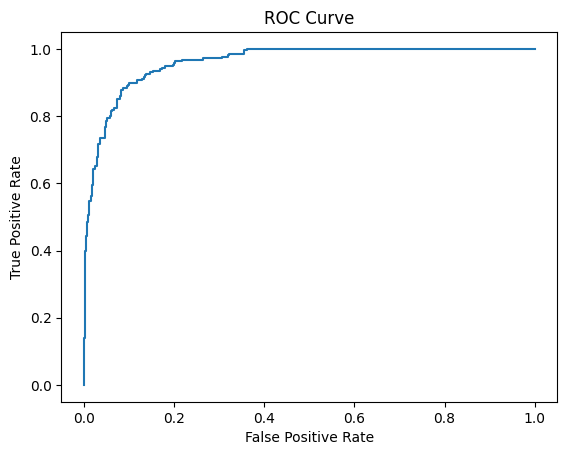

In [23]:
rfc_params = {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}  # Resultado do get_best_params

rf = RandomForestClassifier(**rfc_params, random_state=42)
rf.fit(X_train, y_train)

rfc_pred = rf.predict(X_test) 
predition_stats(y_test, rfc_pred)

pp_rfc = rf.predict_proba(X_train)[:, 1]
ROC_curve(y_train, pp_rfc)